In [34]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
globs = [
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/default/raw_audio/glowTTS_ASR_conformer_x_vector_two_forward_pass*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4/asr_dataset/glow_enc192/glow_*eval/not_silence_preprocessed/training"
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed*/training"
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc768_200ep_not_silence_preprocessed/training"
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/encoding_test/enc768/mean_only/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/encoding_test/enc768/with_sigma/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/encoding_test/enc192/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/encoding_test/enc/768/with_sigma/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/decoder_test/enc768/mean_only/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/decoder_test/enc192/*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/decoder_test/enc768/with_sigma/*/training",
]
lr_files = []
for g in globs:
    lr_files += glob.glob(g)

print(lr_files)
exlude = "speaker_drop"
lr_files = [l for l in lr_files if not exlude in l]
# print(lr_files)
common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files, len(lr_files)

['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc768_200ep_not_silence_preprocessed/training']


({'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc768_200ep_not_silence_preprocessed/training': ''},
 1)

In [36]:
# files[lr_files[-1]] = "Weak Baseline"
lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training"
)
files[lr_files[-1]] = "Former Baseline"
# lr_files.append(
#     "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/no_spec_augment/no_glow/training"
# )
# files[lr_files[-1]] = "Baseline Conformer Only - no spec augment"
# lr_files.append(
#     "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4/asr_dataset/glow_enc192/not_silence_preprocessed/training"
# )
# files[lr_files[-1]] = "Baseline BLSTM with Glow 192"
# lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training")
# files[lr_files[-1]] = "Baseline"
# lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/no_spec_augment/glow_enc192_200ep_not_silence_preprocessed/training")
# files[lr_files[-1]] = "Baseline no spec augment"
# files[lr_files[-3]] = "Glow + Conformer"
# files[lr_files[-2]] = "Glow with x-vector + Conformer"
# files[lr_files[-1]] = "Only Conformer Baseline"

In [37]:
partition_epochs = {}

/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc768_200ep_not_silence_preprocessed/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training: 3
Large Font: False
Setup Interactive Legend
Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))


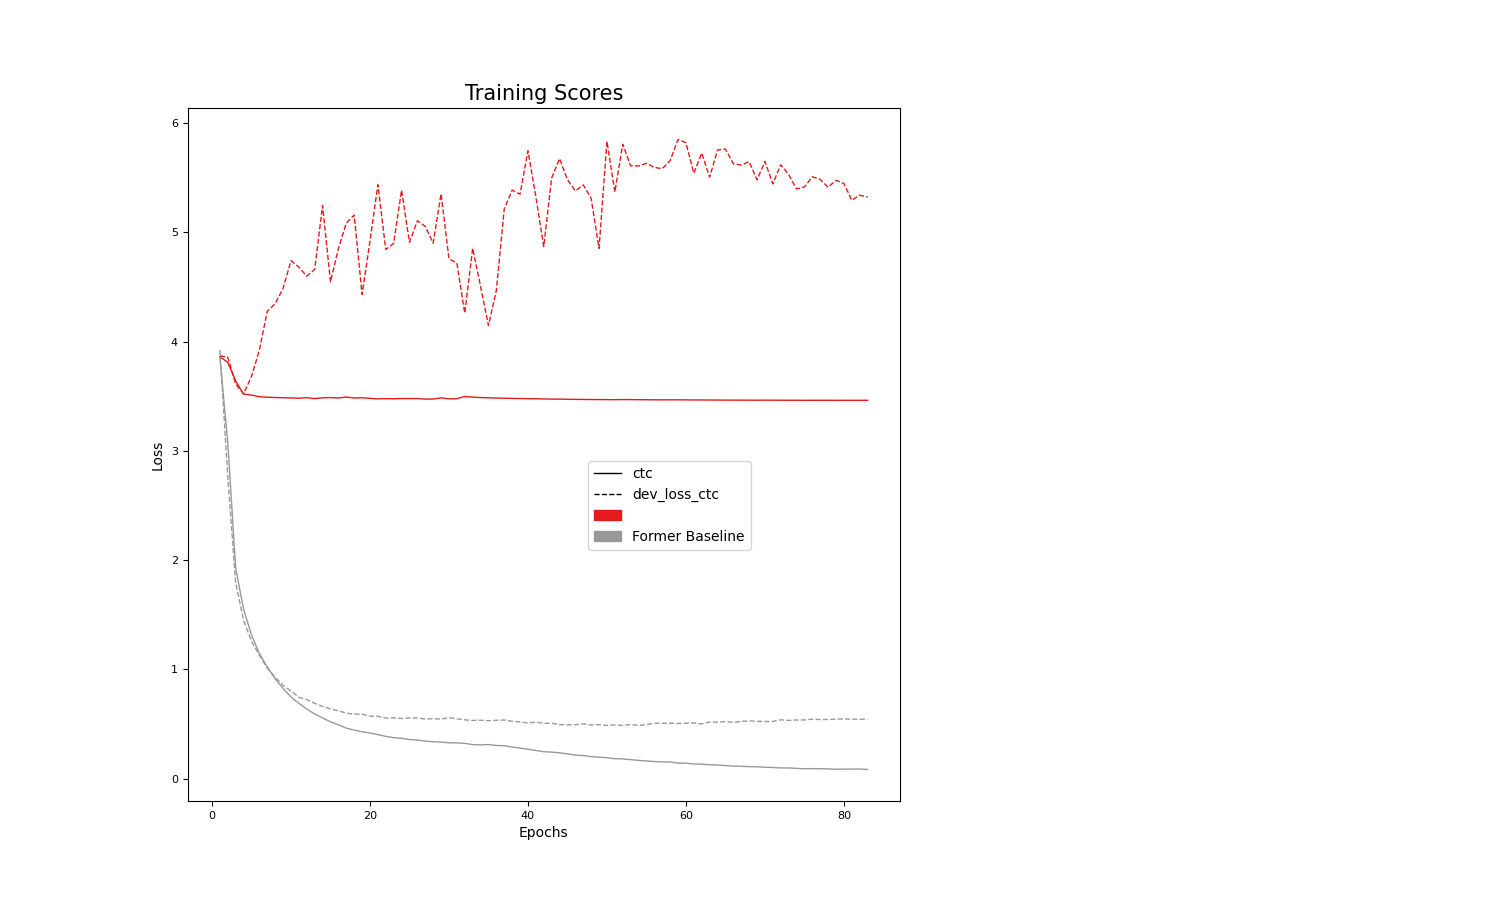

In [38]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    p_e = 3 if lr_file not in partition_epochs else partition_epochs[lr_file]
    print(f"{lr_file}: {p_e}")
    error_data_tmp = []
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data_tmp.append(ep_data)
        error_data_tmp[int(ep % p_e) - 1].update(ep_data_error)
        if ep % p_e == 0:
            ep_data2 = pd.DataFrame(error_data_tmp).mean().to_dict()
            error_data[(labels[i], int(ep // p_e))] = ep_data2
            # error_data[(labels[i], int(ep//p_e))].update(ep_data_error)
            error_data_tmp = []
df = pd.DataFrame.from_dict(error_data, orient="index")
plot_df(
    df,
    plot_lr=False,
    large_font=False,
    shrink_axes=0.6,
    # ylim_max=4,
    # ylim_min=-0.9,
    keys_exclude="devtrain",
    color_map="Set1",
)